In [3]:
# import all the relevant packages.
using Plots, LaTeXStrings, Distributions, DoubleFloats, Plots.PlotMeasures, LinearAlgebra, DataFrames, CSV
Plots.theme(:dao)

In [4]:
pal = cgrad(:tol_muted);
cpal = [pal[i] for i in 0.1:0.1:1.0]

In [5]:
B_data = CSV.read("./B-tab.csv", DataFrame, header = false)
σoff_data = CSV.read("./sigma-off-tab.csv", DataFrame, header = false)
σon_data = CSV.read("./sigma-on-tab.csv", DataFrame, header = false)
ρoff_data = CSV.read("./rho-off-tab.csv", DataFrame, header = false)
e_data = CSV.read("./e-tab.csv", DataFrame, header = false);

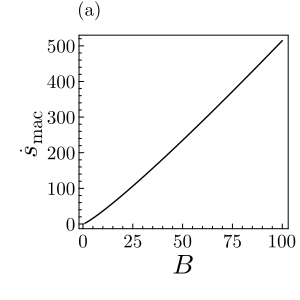

In [6]:
p1 = plot(grid = false, minorgrid = false, legend = :topright, size = (300,300), xlabel = L"$B$", legendfontsize = 12,
xtickfontsize = 12, ytickfontsize = 12, xlabelfontsize = 18, ylabel = L"\dot{s}_{\mathrm{mes}}", ylabelfontsize = 18)
plot!(B_data[:,1], B_data[:,2], color = :black, label = :none, title = "(a)", titleloc = :left)

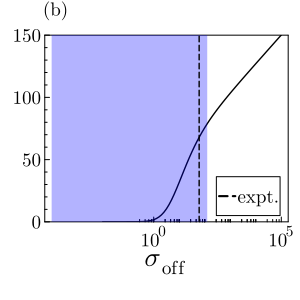

In [51]:
p2 = plot(grid = false, minorgrid = false, legend = :bottomright, size = (300,300), xlabel = L"$\sigma_{\mathrm{off}}$", legendfontsize = 12,
xtickfontsize = 12, ytickfontsize = 12, xlabelfontsize = 18, ylims = [0,150])
plot!(σoff_data[:,1], σoff_data[:,2], color = :black, label = :none, xaxis = :log)
plot!([0.0001, equiv_σoff+std(σoffs)], [160, 160], fillrange=0, fillalpha=0.3, fillcolor=:blue, label=:none)
plot!([equiv_σoff,equiv_σoff],[0,150],linestyle = :dash, color = :black, label = "expt.", title = "(b)", titleloc = :left)

Calculate the mean $\sigma_{on}$ from the $\sigma_u$ column in Table 1 of Ramon's paper.

In [14]:
σon_expt = (0.0061+0.0029+0.0028+0.0251+0.0346+0.0265+0.0344+0.0077+0.0085+0.0109+0.0073+0.0124+0.0087+0.0119+0.0094+0.0089)/16

0.01363125

Ratio of timescales $\sigma_{off}/\sigma_{on}$ is...

In [31]:
δvals = [10.93,89.83,53.11,10.21,8.55,4.86,6.71,16.66,20.51,13.57,13.49,10.15,18.86,12.08,14.54,17.66];

In [32]:
σons = 3 ./δvals;
σoffs = 3*δvals;

In [36]:
equiv_σoff = mean(σoffs)

60.32250000000001

In [35]:
equiv_σon = mean(σons)

0.24515168536116544

In [37]:
std(σoffs)

64.70941677994016

In [38]:
std(σons)

0.142910746622682

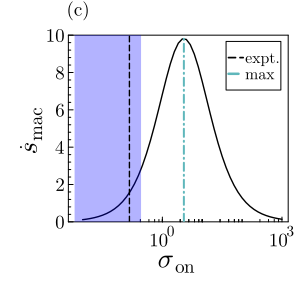

In [50]:
p3 = plot(grid = false, minorgrid = false, legend = :topright, size = (300,300), xlabel = L"$\sigma_{\mathrm{on}}$", legendfontsize = 10,
xtickfontsize = 12, ytickfontsize = 12, xlabelfontsize = 18, ylabel = L"\dot{s}_{\mathrm{mac}}", 
ylabelfontsize = 18, ylims = [0,10])
plot!(σon_data[:,1], σon_data[:,2], color = :black, label = :none, xaxis = :log)
plot!([equiv_σon-std(σons), equiv_σon+std(σons)], [11, 11], fillrange=0, fillalpha=0.3, fillcolor=:blue, label=:none)
plot!([equiv_σon,equiv_σon],[0,10],linestyle = :dash, color = :black, label = "expt.")
plot!([12^0.5,12^0.5],[0,10],linestyle = :dashdot, label = "max", color = cpal[2], lw = 2, title = "(c)", titleloc = :left)

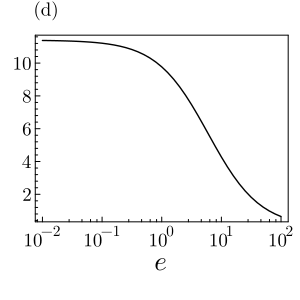

In [25]:
p4 = plot(grid = false, minorgrid = false, legend = :topright, size = (300,300), xlabel = L"$e$", legendfontsize = 12,
xtickfontsize = 12, ytickfontsize = 12, xlabelfontsize = 18)
plot!(e_data[:,1], e_data[:,2], color = :black, label = :none, xaxis = :log, title = "(d)", titleloc = :left)

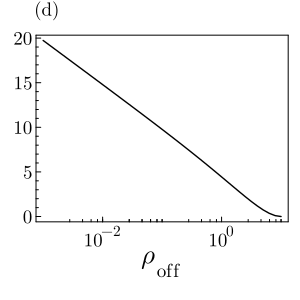

In [23]:
p4 = plot(grid = false, minorgrid = false, legend = :topright, size = (300,300), xlabel = L"$\rho_{\mathrm{off}}$", legendfontsize = 12,
xtickfontsize = 12, ytickfontsize = 12, xlabelfontsize = 18)
plot!(ρoff_data[:,1], ρoff_data[:,2], color = :black, label = :none, xaxis = :log, title = "(d)", titleloc = :left)

In [53]:
combplot = plot(p1,p2,p3,p4,layout = (2,2), size = (600,600), left_margin = -2mm)
savefig("./fig4-single-cell.pdf")

"/home/jamesh/GitHub/thermo-gene-expression/fig4-single-cell.pdf"